# Scores of the XGBoost classifier

## Importing necessary libraries

In [1]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import numpy as np
from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score

/home/arjun/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Preparing the data

We'll use the __load_svmlight_files__ to load the dataset. The feature set has already been prepared for physiological, environmental and vehicular features. The data is in the libSVM format, and we have used *csv2libsvm.py* to convert the csv to this format.

In [4]:
X_train, y_train, X_test, y_test = load_svmlight_files(('fordTrain1.txt', 'fordTest1.txt'))
X_train

<604329x27 sparse matrix of type '<class 'numpy.float64'>'
	with 12909227 stored elements in Compressed Sparse Row format>

In [5]:
X_trainP, y_trainP, X_testP, y_testP = load_svmlight_files(('X_trainP.txt', 'X_testP.txt'))


In [6]:
X_trainE, y_trainE, X_testE, y_testE = load_svmlight_files(('X_trainE.txt', 'X_testE.txt'))


In [8]:
X_trainV, y_trainV, X_testV, y_testV = load_svmlight_files(('X_trainV.txt', 'X_testV.txt'))
X_train

<604329x27 sparse matrix of type '<class 'numpy.float64'>'
	with 12909227 stored elements in Compressed Sparse Row format>

In [9]:
print("Train dataset contains {0} rows and {1} columns".format(X_train.shape[0], X_train.shape[1]))
print("Test dataset contains {0} rows and {1} columns".format(X_test.shape[0], X_test.shape[1]))

Train dataset contains 604329 rows and 27 columns
Test dataset contains 120840 rows and 27 columns


In [10]:
print("Train possible labels: ")
print(np.unique(y_train))

print("\nTest possible labels: ")
print(np.unique(y_test))

Train possible labels: 
[ 0.  1.]

Test possible labels: 
[ 0.  1.]


## Training our model

In [11]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.01,
    'silent': 1.0,
    'n_estimators': 30
}

In [12]:
bst = XGBClassifier(**params)

In [13]:
bstP = XGBClassifier(**params)

In [14]:
bstE = XGBClassifier(**params)

In [15]:
bstV = XGBClassifier(**params)

In [16]:
# X_train_d=X_train.toarray()
bst=bst.fit(X_train,y_train)

In [17]:
bstP=bstP.fit(X_trainP,y_trainP)

In [18]:
bstE=bstE.fit(X_trainE,y_trainE)

In [19]:
bstV=bstV.fit(X_trainV,y_trainV)

## Evaluating our model

In [20]:
# X_test_d=X_test.toarray()
preds = bst.predict(X_test)
predsP = bstP.predict(X_testP)
predsE = bstE.predict(X_testE)
predsV = bstV.predict(X_testV)

### Evaluating the feature importances 

Ensemble trees are great algorithms to observe feature importances. Hence, below we have plotted the feature importances for each dataset which can further help us in the feature selection process.

__Feature importances for the multimodal dataset__

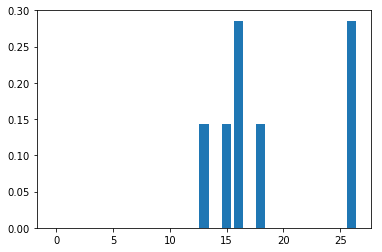

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.14285715,  0.        ,
        0.14285715,  0.2857143 ,  0.        ,  0.14285715,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.2857143 ], dtype=float32)

In [21]:
from matplotlib import pyplot
%matplotlib inline
pyplot.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
pyplot.show()
bst.feature_importances_


Hence, the most significant features in the multimodal dataset are *E7*, *E8*, *E9*, *V1* and *V11*.

__Feature importances for the physiological dataset__

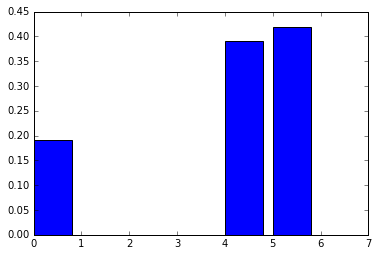

array([ 0.19047619,  0.        ,  0.        ,  0.        ,  0.3904762 ,
        0.41904762,  0.        ], dtype=float32)

In [22]:
__Feature importances for the multimodal dataset__
pyplot.bar(range(len(bstP.feature_importances_)), bstP.feature_importances_)
pyplot.show()
bstP.feature_importances_

Hence, the most significant features in the physiological modality are *P1*, *P5* and *P6*.

__Feature importances for the environmental dataset__

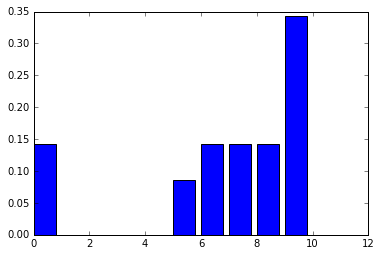

array([ 0.14285715,  0.        ,  0.        ,  0.        ,  0.        ,
        0.08571429,  0.14285715,  0.14285715,  0.14285715,  0.34285715,  0.        ], dtype=float32)

In [23]:

pyplot.bar(range(len(bstE.feature_importances_)), bstE.feature_importances_)
pyplot.show()
bstE.feature_importances_

Hence, the most significant features in the environmental modality are *E1*, *E6*, *E7*, *E8*, *E9* and *E10*.

__Feature importances for the vehicular dataset__

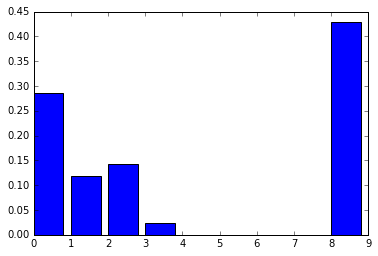

array([ 0.2857143 ,  0.11904762,  0.14285715,  0.02380952,  0.        ,
        0.        ,  0.        ,  0.        ,  0.42857143], dtype=float32)

In [24]:

pyplot.bar(range(len(bstV.feature_importances_)), bstV.feature_importances_)
pyplot.show()
bstV.feature_importances_

Hence, the most significant features in the vehicular modality are *V1*, *V2*, *V3*, *V5* and *V11*.

### Evaluating the accuracy  

In [25]:
correct1 = 0

for i in range(len(preds)):
    if (y_test[i] == preds[i]):
        correct1 += 1
        
acc1 = accuracy_score(y_test, preds)

print('Predicted correctly: {0}/{1}'.format(correct1, len(preds)))
print(acc1)

Predicted correctly: 106565/120840
0.881868586561


In [26]:
correct1 = 0

for i in range(len(predsP)):
    if (y_testP[i] == predsP[i]):
        correct1 += 1
        
acc1 = accuracy_score(y_testP, predsP)

print('Predicted correctly: {0}/{1}'.format(correct1, len(predsP)))
print(acc1)

Predicted correctly: 79193/120840
0.655354187355


In [27]:
correct1 = 0

for i in range(len(predsE)):
    if (y_testE[i] == predsE[i]):
        correct1 += 1
        
acc1 = accuracy_score(y_testE, predsE)

print('Predicted correctly: {0}/{1}'.format(correct1, len(predsE)))
print(acc1)

Predicted correctly: 85861/120840
0.710534591195


In [28]:
correct2 = 0

for i in range(len(predsV)):
    if (y_testV[i] == predsV[i]):
        correct2 += 1
        
acc2 = accuracy_score(y_testV, predsV)

print('Predicted correctly: {0}/{1}'.format(correct2, len(predsV)))
print(acc2)

Predicted correctly: 84035/120840
0.695423700761


### Evaluating the specificity and sensitivity

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confmatrix1=confusion_matrix(y_test, preds)
confmatrixP=confusion_matrix(y_testP, predsP)
confmatrixE=confusion_matrix(y_testE, predsE)
confmatrixV=confusion_matrix(y_testV, predsV)

### Utility function

This function will help us to find the specificity and sensitivity from the confusion matrix.

In [31]:
def specandsens(a):
    sens=a[1][1]/(a[1][1]+a[1][0])
    spec=a[0][0]/(a[0][0]+a[0][1])
    return spec,sens

In [32]:
spec1,sens1=specandsens(confmatrix1)
print(spec1,sens1)# specificity and sensitivity

0.527077622518 0.998592261839


In [33]:
specP,sensP=specandsens(confmatrixP)
print(specP,sensP)# specificity and sensitivity

0.106705890219 0.835855530871


In [34]:
specE,sensE=specandsens(confmatrixE)
print(specE,sensE)# specificity and sensitivity

0.608043056763 0.744253568836


In [35]:
specV,sensV=specandsens(confmatrixV)
print(specV,sensV)# specificity and sensitivity

0.144681420071 0.876613949805


### Evaluating the roc_auc score

In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
roc_auc_score(y_test,bst.predict_proba(X_test)[:,1])

0.77640274062464254

In [ ]:
roc_auc_score(y_testE,bst.predict_proba(X_testP)[:,1])

In [ ]:
roc_auc_score(y_testE,bst.predict_proba(X_testE)[:,1])

In [ ]:
roc_auc_score(y_testV,bst.predict_proba(X_testV)[:,1])